This is an interactive code notebook, I will first import three python extension package to read data, divide it into 2 chunck and build up regression picture

In [578]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

First of all, I will load data, and initialize variables for later utilization. For loading, I could use either Numpy or Pandas. Both of them are widely used for data processing. However, The difference between Pandas and Numpy, Numpy is a matrix-based mathematical calculation module, an extension package for numerical calculations, Pandas mainly does data processing, providing the DataFrame data structure. For this question I tend to use Numpy to form a matrix, and then divide the original data set into training and testing set.

In [579]:
#load data
load = pd.read_excel(r"Data\Concrete_Data.xls")
data = np.array(load) 
# initialization

# the range of index_of_current_character should be [0,7]
index_of_current_character = 7

character = load.columns[index_of_current_character]
#divide the set into two parts
training_set = data[:900]
testing_set = data[900:]
# for training set
x_training = training_set[:,index_of_current_character] 
y_training = training_set[:,-1] 
# for testinh set
x_testing = testing_set[:, index_of_current_character]
y_testing = testing_set[:,-1]
#the learning rate alpha
lr = 1e-6
epoches = 1000
#For coefficient m and b:
initial_m_b = np.array([[0.0, 0.0] , [0.1, 33], [100.1 , 40.0] , [70 , -0.3] , [0, 30] , [24.5, 0], [35 , 0] , [0.1, 29.0]])
current_character_m_b  = np.array(initial_m_b[index_of_current_character], dtype= "double")
m = current_character_m_b[0]
b= current_character_m_b[1]


(A) Uni-variate linear regression 
For this question, I will define two function: the first one is uni_variate_linear_regression_model_training 
for training to get value of coefficient m and b; the second is to calculate mean square error(MSE) for both training and testing set.

In [580]:
#For training:
def uni_variate_linear_regression_model_training(current_character_m_b, x_training ,y_training, lr, epoches):
    x_training_size = x_training.shape[0]
    for i in range(epoches):
        y_predicted = current_character_m_b[0]* x_training + current_character_m_b[1]
        current_character_m_b[0] = current_character_m_b[0] - lr * sum(2 * (y_predicted - y_training) * x_training) / x_training_size
        current_character_m_b[1] = current_character_m_b[1] - lr * sum(2 * y_predicted - y_training) / x_training_size
    print("Current feature variable is: {}".format(character))
    return current_character_m_b

#after training, use m and b for calculate mse
def uni_variate_linear_regression_model(x_training, y_training,x_testing, y_testing, current_character_m_b):
    #initial coefficient
    m = current_character_m_b[0]
    b = current_character_m_b[1]
    #record size of set
    x_training_size = x_training.shape[0]
    x_testing_size = x_testing.shape[0]
    #regression formula
    y_training_predicted = m * x_training + b
    y_test_predicted = m * x_testing + b
    #Calculate MSE for x_training and x_testing
    mse_train = np.sum((y_training -  y_training_predicted ) ** 2, dtype='double') / x_training_size
    mse_test = np.sum((y_testing - y_test_predicted ) ** 2, dtype='double') / x_testing_size
    print("the coefficient m of this question should be:{}".format(m))
    print("the coefficient b of this question should be:{}".format(b))
    print("MSE of Traing set's MSE is: {}".format( round(mse_train, 3)))
    print("MSE of Test set's MSE is: {}".format(round(mse_test, 3)))
    return mse_train,mse_test

warnings.filterwarnings('ignore')
current_character_m_b = uni_variate_linear_regression_model_training(current_character_m_b, x_training, y_training, lr, epoches)
final_model_trained_mse = uni_variate_linear_regression_model(x_training, y_training, x_testing, y_testing, current_character_m_b)


Current feature variable is: Age (day)
the coefficient m of this question should be:0.10863230970133013
the coefficient b of this question should be:28.968001769545744
MSE of Traing set's MSE is: 270.035
MSE of Test set's MSE is: 143.722


After preparation of MSE's value, now we can calculate the variance explained for the response varibale as followed:

In [581]:
#calculate the variance 

def calculate_current_character_variance(y):
    n = y.shape[0]
    mean = np.sum(y_training) / n
    sum = 0
    for i in y_training:
        sum_1 = (i - mean)**2
        sum = sum_1 + sum
    current_character_variance = sum / n
    return current_character_variance

#get variance explained for the response variable: 1 - MSE / variance(observed)
def calculate_current_character_variance_explained(current_character_variance, final_model_trained_mse):
    result_training_set = 1 - (final_model_trained_mse[0] / current_character_variance)
    result_testing_set = 1 - (final_model_trained_mse[1] / current_character_variance)
    print("the variance explained of training set in this model is {}". format(round(result_training_set,3)))
    print("the variance explained of testing set in this model is {}". format(round(result_testing_set,3)))
    return

current_character_variance = calculate_current_character_variance(y_training)
result = calculate_current_character_variance_explained(current_character_variance, final_model_trained_mse)

the variance explained of training set in this model is 0.087
the variance explained of testing set in this model is 0.514


Utilize matplotlib to draw a plot to present relation between a character and concrete compressive strength(Mpa)

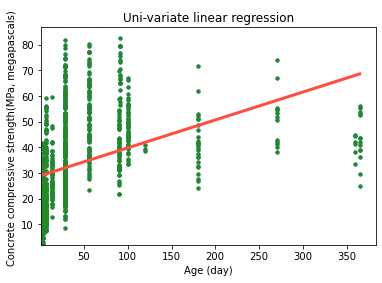

In [582]:
x = np.arange(np.min(x_training), np.max(x_training), 0.2)
y = x * current_character_m_b[0]  + current_character_m_b[1]
plt.figure()
plt.scatter(x_training, y_training, s=10)
plt.plot(x_training, y_training, '.', color = '#228b22')
plt.plot(x, y, linewidth=3, color = '#ff4d40')
plt.xlim([0.9 * min(x_training), 1.05 * max(x_training)])
plt.ylim([0.9 * min(y_training), 1.05 * max(y_training)])
plt.xlabel(character)
plt.ylabel(load.columns[-1])
plt.title("Uni-variate linear regression")   
plt.show()

(B) Multi-variate linear regression

After plusing the b(intercept) parameter, now we have nine model parameters for this question. For optimizing a multi-variate linear regression model, I will apply the gradient descent algorithm, and utilize mean sqaured error objective function

Mult-variate linear models can be succinctly represented as :
y = f(x) = (m,x)
where m = (m0, m1,...,m7)^T and x = (1,x1,x2,...,x7)^T 

In [583]:
#initialization
x_training = data[:900, :-1]
# y_training = data[:900, -1]
x_testing = data[900:, :-1]
# y_testing = data[900:, -1]
#for m0, we should insert 1 for training and testing set:
x_training = np.insert(x_training, 0 , values= np.ones(x_training.shape[0]), axis= 1)
x_testing = np.insert(x_testing, 0 , values= np.ones(x_testing.shape[0]), axis= 1)
#new learning rate:
lr = 5.85e-7
#new epoch
epoches = 500
def multi_variate_linear_regression_training(x_training, y_training, lr, epoches):
    #initial m np.ones?
    m = np.zeros(x_training.shape[1])
    for i in range(epoches):
        multi_variate_y_predicted =  x_training @ m
        delta = multi_variate_y_predicted - y_training
        m = m - lr * (2/x_training.shape[0] * (delta @ x_training))
        
    return m

def  multi_variate_linear_regression_model(current_character_m, x_training, y_training, x_testing, y_testing):
    m = current_character_m
    mse_training = np.sum ((x_training @ m - y_training) ** 2) / x_training.shape[0]
    mse_testing = np.sum ((x_testing @ m - y_testing) ** 2) / x_testing.shape[0]
    # print("the coefficient m of this question should be:{}".format(m.shape))
    print("the mse of multi-vartiate model's training set is {}".format(round(mse_training, 1)))
    print("the mse of multi-vartiate model's testing set is {}".format(round(mse_testing, 1)))
    print(m)
    return mse_training, mse_testing

current_character_m = multi_variate_linear_regression_training(x_training, y_training, lr, epoches)
multi_variate_mse_result = multi_variate_linear_regression_model(current_character_m, x_training, y_training, x_testing, y_testing)
print(multi_variate_mse_result)


the mse of multi-vartiate model's training set is 136.3
the mse of multi-vartiate model's testing set is 56.8
[ 2.91177805e-05  1.02119833e-01  7.34192201e-02  7.03044631e-02
 -5.19547716e-02  1.85439994e-02 -4.37869361e-03  9.99780293e-03
  8.46956980e-02]
(136.30846678358665, 56.80789678479352)


In [584]:
#calculate the variance explained of multi-variate regression model for all characters
current_character_variance = calculate_current_character_variance(y_training)
result = calculate_current_character_variance_explained(current_character_variance, multi_variate_mse_result)

the variance explained of training set in this model is 0.539
the variance explained of testing set in this model is 0.808


（C）Multi-variate polynomial regression

For the question C, what I should extended is a multi-variate quadratic regression model, which has 36 quadratic terms, and eight linear terms. For the question D, I will try to normalize wor standardize each variable, as some variables, such like Age and Cement, do not have same unit of measurement.

In [585]:
def reshape_a_new_dataset(data):
    i = 0
    j = 0
    # total_characters = 8, two while loop to calculate x1^2, x1 * x2, ..., x8^2
    while (i < 9):
        j = i
        while (j < 8):
            x = data[: , j] 
            h = np.reshape(x, (1,-1)) * data[: , j] 
            l = np.reshape(h, (1,-1))
            data = np.insert(data, obj=data.shape[1] - 1 , values= l, axis= 1)
            j+=1
        i += 1
    data = np.insert(data, obj=0 , values= np.ones(data.shape[0]), axis= 1)
    return data
print("before add characters:{}".format(data.shape))
processed_data = reshape_a_new_dataset(data)
print("after add characters:{}".format(processed_data.shape))

before add characters:(1030, 9)
after add characters:(1030, 46)


In [586]:
#initialization
x_training = processed_data[:900, :-1]
y_training = processed_data[:900, -1]
x_testing = processed_data [900:, :-1]
y_testing = processed_data [900:, -1]

#new learning rate:
lr = 1.1e-13
#new epoch
epoches = 100000

In [587]:
def multi_variate_linear_regression_training(x_training, y_training, lr, epoches):
    m = np.zeros(x_training.shape[1])
    for i in range(epoches):
        multi_variate_y_predicted =  x_training @ m
        delta = multi_variate_y_predicted - y_training
        m = m - lr * (2/x_training.shape[0] * (delta @ x_training))    
    return m

def  multi_variate_linear_regression_model(current_character_m, x_training, y_training, x_testing, y_testing):
    m = current_character_m
    mse_training = np.sum ((x_training @ m - y_training) ** 2) / x_training.shape[0]
    mse_testing = np.sum ((x_testing @ m - y_testing) ** 2) / x_testing.shape[0]
    print("the mse of multi-vartiate model's training set is {}".format(round(mse_training, 1)))
    print("the mse of multi-vartiate model's testing set is {}".format(round(mse_testing, 1)))
    return mse_training, mse_testing


current_character_m = multi_variate_linear_regression_training(x_training, y_training, lr, epoches)
multi_variate_mse_result = multi_variate_linear_regression_model(current_character_m, x_training, y_training, x_testing, y_testing)
print(multi_variate_mse_result)

the mse of multi-vartiate model's training set is 185.3
the mse of multi-vartiate model's testing set is 119.9
(185.34482163100196, 119.94098034145868)


In [588]:
#calculate the variance explained for the response variable:
current_character_variance = calculate_current_character_variance(y_training)
result = calculate_current_character_variance_explained(current_character_variance, multi_variate_mse_result)

the variance explained of training set in this model is 0.374
the variance explained of testing set in this model is 0.595


(D)Data pre-processing
About Normalization, Standardization.

"Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling."4

"Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation."4

I think once we finished pre-processing the data by normalizing or standardizing each variable, the MSE will dramatically reduced, and the preformence of the model will be improved a lot. For this question, I will use training set to calculate!

In [589]:
#referred with 5
from sklearn.preprocessing import StandardScaler, Normalizer
def normalization(x):
    normalized_data = Normalizer().fit_transform(x)
    return normalized_data
 
def standardization(x):
    standardized_data = StandardScaler().fit_transform(x)
    return standardized_data

data_with_46_column = processed_data
x_variable_preprocess = data_with_46_column[:, :-1]
after_normalization = normalization(x_variable_preprocess)
after_standardization = standardization(x_variable_preprocess)


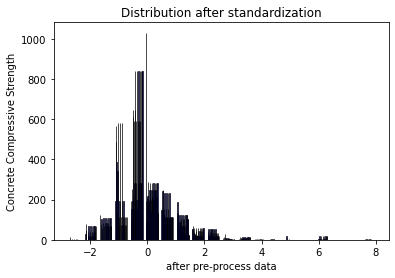

In [595]:
# for creating histograms that illustrate how the distribution of a feature variables' changed.[6]

#change data to get differnet distribution
# data = after_normalization
data = after_standardization
# data = data_with_46_column 


plt.hist(data, bins=20, facecolor="blue", edgecolor="black", alpha=0.7)
plt.xlabel("after pre-process data")
plt.ylabel("Concrete Compressive Strength")
# plt.title("Original distribution")
plt.title("Distribution after standardization")
# plt.title("Distribution after normalization")
plt.show()

In [591]:
#initialization
x_training = after_normalization  [:900, :-1]
y_training = after_normalization  [:900, -1]
x_testing = after_normalization  [900:, :-1]
y_testing = after_normalization [900:, -1]

#new learning rate:
lr = 1.1e-13
#new epoch
epoches = 100000

current_character_m = multi_variate_linear_regression_training(x_training, y_training, lr, epoches)
multi_variate_mse_result = multi_variate_linear_regression_model(current_character_m, x_training, y_training, x_testing, y_testing)
current_character_variance = calculate_current_character_variance(y_training)
result = calculate_current_character_variance_explained(current_character_variance, multi_variate_mse_result)
print(multi_variate_mse_result)

the mse of multi-vartiate model's training set is 0.0
the mse of multi-vartiate model's testing set is 0.0
the variance explained of training set in this model is -0.095
the variance explained of testing set in this model is 0.999
(7.228348558334754e-05, 9.476957712306879e-08)


In [592]:
x_training = after_standardization [:900, :]
y_training = after_standardization [:900, -1]
x_testing = after_standardization [900:, :]
y_testing = after_standardization [900:, -1]

#new learning rate:
lr = 1.1e-13
#new epoch
epoches = 100000

current_character_m = multi_variate_linear_regression_training(x_training, y_training, lr, epoches)
multi_variate_mse_result = multi_variate_linear_regression_model(current_character_m, x_training, y_training, x_testing, y_testing)
current_character_variance = calculate_current_character_variance(y_training)
result = calculate_current_character_variance_explained(current_character_variance, multi_variate_mse_result)
print(multi_variate_mse_result)

the mse of multi-vartiate model's training set is 1.1
the mse of multi-vartiate model's testing set is 0.1
the variance explained of training set in this model is -0.001
the variance explained of testing set in this model is 0.939
(1.1345330579318404, 0.06861343078398412)


In [593]:
#This is for get the result of standardlized data from uni-variate regression 
index_of_current_character = 0
character = load.columns[index_of_current_character]
training_set = after_standardization[:900]
testing_set = after_standardization[900:]
# for training set
x_training = training_set[:,index_of_current_character] 
y_training = training_set[:,-1] 
# for testinh set
x_testing = testing_set[:, index_of_current_character]
y_testing = testing_set[:,-1]


current_character_m_b = uni_variate_linear_regression_model_training(current_character_m_b, x_training, y_training, lr, epoches)
final_model_trained_mse = uni_variate_linear_regression_model(x_training, y_training, x_testing, y_testing, current_character_m_b)

Current feature variable is: Cement (component 1)(kg in a m^3 mixture)
the coefficient m of this question should be:0.10863230970133013
the coefficient b of this question should be:28.96800113254418
MSE of Traing set's MSE is: 838.088
MSE of Test set's MSE is: 854.39


The websites I referred to finish this work:

1.https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html

2.https://towardsdatascience.com/top-10-matrix-operations-in-numpy-with-examples-d761448cb7a8

3.https://blog.csdn.net/tintinetmilou/article/details/78119320

4.https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

5..https://www.codenong.com/4544292/

6.https://blog.csdn.net/hohaizx/article/details/79101322